In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

### Split data

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
data = pd.read_csv("./Age processing/train_AgeFilled.csv")
data.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Mr,Mrs,Miss,Master,Dr,Other
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1.0,0.0,0.0,0.0,0.0,0.0
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.0,1.0,0.0,0.0,0.0,0.0
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.0,0.0,1.0,0.0,0.0,0.0
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.0,1.0,0.0,0.0,0.0,0.0
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1.0,0.0,0.0,0.0,0.0,0.0


In [66]:
def data_preproessing(data):
    data.drop(labels=["Unnamed: 0"],axis=1)
    trimmed_data = data.drop(labels=["Name","Ticket","Cabin","PassengerId","Unnamed: 0"],axis=1)
    return trimmed_data

In [67]:
trimmed_data = data_preproessing(data)
train_data,test_data = train_test_split(trimmed_data,test_size=0.3)

In [68]:
train_y = np.array(train_data["Survived"])
test_y = np.array(test_data["Survived"])

In [69]:
train_X = pd.get_dummies(train_data.drop(labels=["Survived"],axis=1))
test_X = pd.get_dummies(test_data.drop(labels=["Survived"],axis=1))

In [70]:
train_X.head()

,Pclass,Age,SibSp,Parch,Fare,Mr,Mrs,Miss,Master,Dr,Other,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
359,3,24.0,0,0,7.8792,0.0,0.0,1.0,0.0,0.0,0.0,1,0,0,1,0
344,2,36.0,0,0,13.0000,1.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,1
854,2,44.0,1,0,26.0000,0.0,1.0,0.0,0.0,0.0,0.0,1,0,0,0,1
560,3,35.0,0,0,7.7500,1.0,0.0,0.0,0.0,0.0,0.0,0,1,0,1,0
76,3,29.0,0,0,7.8958,1.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,1


### Scale data

In [71]:
from sklearn.preprocessing import StandardScaler

In [72]:
### Scale the data
def scale_data(data):
    age_array = np.array(data)[:,np.newaxis]
    age_scaler = StandardScaler().fit(age_array)
    scaled_age = age_scaler.transform(age_array)[:,0]
    return scaled_age

In [73]:
train_X["Age"] = scale_data(train_X["Age"])
train_X["Fare"] = scale_data(train_X["Fare"])

In [74]:
test_X["Age"] = scale_data(test_X["Age"])
test_X["Fare"] = scale_data(test_X["Fare"])

In [75]:
train_X.head()

,Pclass,Age,SibSp,Parch,Fare,Mr,Mrs,Miss,Master,Dr,Other,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
359,3,-0.417568,0,0,-0.493625,0.0,0.0,1.0,0.0,0.0,0.0,1,0,0,1,0
344,2,0.470170,0,0,-0.394598,1.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,1
854,2,1.061995,1,0,-0.143201,0.0,1.0,0.0,0.0,0.0,0.0,1,0,0,0,1
560,3,0.396192,0,0,-0.496124,1.0,0.0,0.0,0.0,0.0,0.0,0,1,0,1,0
76,3,-0.047677,0,0,-0.493304,1.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,1


In [76]:
test_X.head()

,Pclass,Age,SibSp,Parch,Fare,Mr,Mrs,Miss,Master,Dr,Other,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
399,2,-0.097446,0,0,-0.377335,0.0,1.0,0.0,0.0,0.0,0.0,1,0,0,0,1
297,1,-1.980111,1,2,2.749362,0.0,0.0,1.0,0.0,0.0,0.0,1,0,0,0,1
102,1,-0.604317,0,1,1.077682,1.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,1
445,1,-1.835291,0,2,1.180573,0.0,0.0,0.0,1.0,0.0,0.0,0,1,0,0,1
608,2,-0.531907,1,2,0.273874,0.0,1.0,0.0,0.0,0.0,0.0,1,0,1,0,0


### Build models

In [77]:
#Since this is a classification task, we use logistic regression, FDA, naive bayes, classification tree, SVM and neural network as our models

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import cross_val_score

### Logistic Regression

In [78]:
LR = LogisticRegression()
LR.fit(train_X,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [79]:
LR_CV_score_train = cross_val_score(LR,train_X,train_y,cv=10)
LR_CV_score_test = cross_val_score(LR,test_X,test_y,cv=10)

In [80]:
print(LR_CV_score_train.mean(),LR_CV_score_test.mean())

0.8185041088531305 0.8019943019943019


In [81]:
LR_predict_y = LR.predict(test_X)

In [82]:
LR_error_rate = np.sum((abs(test_y-LR_predict_y)))/LR_predict_y.shape[0]

### Linear Discriminant Analysis

In [83]:
LDA = LinearDiscriminantAnalysis()
LDA.fit(train_X,train_y)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [84]:
LDA_CV_score_train = cross_val_score(LDA,train_X,train_y,cv=10)
LDA_CV_score_test = cross_val_score(LDA,test_X,test_y,cv=10)

In [85]:
LDA_predict_y = LDA.predict(test_X)

In [86]:
LDA_error_rate = np.sum((abs(test_y-LDA_predict_y)))/LDA_predict_y.shape[0]

### Naive Bayes

In [87]:
NB = GaussianNB()
NB.fit(train_X,train_y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [88]:
NB_CV_score_train = cross_val_score(NB,train_X,train_y,cv=10)
NB_CV_score_test = cross_val_score(NB,test_X,test_y,cv=10)

In [89]:
NB_predict_y = NB.predict(test_X)

In [90]:
NB_error_rate = np.sum((abs(test_y-NB_predict_y)))/NB_predict_y.shape[0]

### Decition Tree Classifier

In [91]:
DTC = DecisionTreeClassifier()
DTC.fit(train_X,train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [92]:
DTC_CV_score_train = cross_val_score(DTC,train_X,train_y,cv=10)
DTC_CV_score_test = cross_val_score(DTC,test_X,test_y,cv=10)

In [93]:
DTC_predict_y = DTC.predict(test_X)

In [94]:
DTC_error_rate = np.sum((abs(test_y-DTC_predict_y)))/DTC_predict_y.shape[0]

### Support Vector Classifier

In [95]:
SVM_classfier = SVC()
SVM_classfier.fit(train_X,train_y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [96]:
SVM_CV_score_train = cross_val_score(SVM_classfier,train_X,train_y,cv=10)
SVM_CV_score_test = cross_val_score(SVM_classfier,test_X,test_y,cv=10)

In [97]:
SVM_predict_y = SVM_classfier.predict(test_X)

In [98]:
SVM_error_rate = np.sum((abs(test_y-SVM_predict_y)))/SVM_predict_y.shape[0]

### Neural Network

In [99]:
NN = MLPClassifier(hidden_layer_sizes=(64))
NN.fit(train_X,train_y)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=64, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [100]:
NN_CV_score_train = cross_val_score(NN,train_X,train_y,cv=10)
NN_CV_score_test = cross_val_score(NN,test_X,test_y,cv=10)

In [101]:
NN_predict_y = NN.predict(test_X)

In [102]:
NN_error_rate = np.sum((abs(test_y-NN_predict_y)))/NN_predict_y.shape[0]

### Model Comparsion

Model names:  ['LR', 'LDA', 'GaussianNB', 'DTC', 'SVM', 'NN']
Model errors:  [0.17164179104477612, 0.16417910447761194, 0.208955223880597, 0.2574626865671642, 0.16417910447761194, 0.16791044776119404]


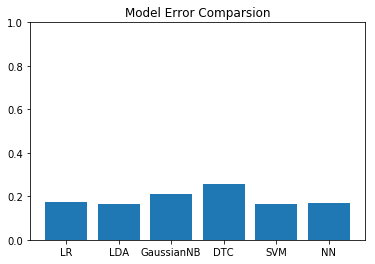

In [103]:
def draw_comparison(model_names,model_errors,title="Model Error Comparsion",y_range=(0,1)):
    print("Model names: ",model_names)
    print("Model errors: ",model_errors)
    plt.bar(model_names,model_errors)
    plt.ylim(y_range)
    plt.title(title)

model_names = ["LR","LDA","GaussianNB","DTC","SVM","NN"]
model_errors = [LR_error_rate,LDA_error_rate,NB_error_rate,DTC_error_rate,SVM_error_rate,NN_error_rate]

draw_comparison(model_names,model_errors)

### Cross Validation

In [104]:
CV_meanscore_list = [LR_CV_score_test.mean(),LDA_CV_score_test.mean(),NB_CV_score_test.mean(),DTC_CV_score_test.mean(),SVM_CV_score_test.mean(),NN_CV_score_test.mean()]

Model names:  ['LR', 'LDA', 'GaussianNB', 'DTC', 'SVM', 'NN']
Model errors:  [0.8019943019943019, 0.8132478632478632, 0.44373219373219375, 0.7501424501424501, 0.8282051282051283, 0.8170940170940171]


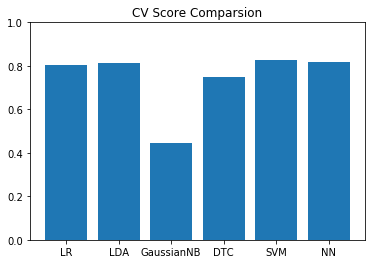

In [105]:
draw_comparison(model_names,CV_meanscore_list,title="CV Score Comparsion")

### Submission

In [44]:
submit_data = pd.read_csv("./Age processing/test_AgeFilled.csv")

In [45]:
submit_data.head()

,Unnamed: 0,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Mr,Mrs,Miss,Master,Dr,Other
0,0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1.0,0.0,0.0,0.0,0.0,0.0
1,1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0.0,1.0,0.0,0.0,0.0,0.0
2,2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1.0,0.0,0.0,0.0,0.0,0.0
3,3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1.0,0.0,0.0,0.0,0.0,0.0
4,4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0.0,1.0,0.0,0.0,0.0,0.0


In [46]:
trimmed_submit_data = submit_data.drop(labels=["Name","Ticket","Cabin","PassengerId","Unnamed: 0"],axis=1)

In [47]:
trimmed_submit_data = pd.get_dummies(trimmed_submit_data)

In [48]:
trimmed_submit_data["Age"] = scale_data(trimmed_submit_data["Age"])
trimmed_submit_data["Fare"] = scale_data(trimmed_submit_data["Fare"])

In [49]:
submit_X = trimmed_submit_data
submit_X = pd.get_dummies(submit_X)
submit_X.head()

,Pclass,Age,SibSp,Parch,Fare,Mr,Mrs,Miss,Master,Dr,Other,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,0.357049,0,0,-0.497811,1.0,0.0,0.0,0.0,0.0,0.0,0,1,0,1,0
1,3,1.306695,1,0,-0.512660,0.0,1.0,0.0,0.0,0.0,0.0,1,0,0,0,1
2,2,2.446271,0,0,-0.464532,1.0,0.0,0.0,0.0,0.0,0.0,0,1,0,1,0
3,3,-0.212739,0,0,-0.482888,1.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,1
4,3,-0.592598,1,1,-0.417971,0.0,1.0,0.0,0.0,0.0,0.0,1,0,0,0,1


In [50]:
submit_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 16 columns):
Pclass        418 non-null int64
Age           418 non-null float64
SibSp         418 non-null int64
Parch         418 non-null int64
Fare          417 non-null float64
Mr            418 non-null float64
Mrs           418 non-null float64
Miss          418 non-null float64
Master        418 non-null float64
Dr            418 non-null float64
Other         418 non-null float64
Sex_female    418 non-null uint8
Sex_male      418 non-null uint8
Embarked_C    418 non-null uint8
Embarked_Q    418 non-null uint8
Embarked_S    418 non-null uint8
dtypes: float64(8), int64(3), uint8(5)
memory usage: 38.0 KB


## Who the fuck didn't pay his fare [Smile][Smile]

In [51]:
submit_X = submit_X.fillna(32.204208)

In [52]:
submit_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 16 columns):
Pclass        418 non-null int64
Age           418 non-null float64
SibSp         418 non-null int64
Parch         418 non-null int64
Fare          418 non-null float64
Mr            418 non-null float64
Mrs           418 non-null float64
Miss          418 non-null float64
Master        418 non-null float64
Dr            418 non-null float64
Other         418 non-null float64
Sex_female    418 non-null uint8
Sex_male      418 non-null uint8
Embarked_C    418 non-null uint8
Embarked_Q    418 non-null uint8
Embarked_S    418 non-null uint8
dtypes: float64(8), int64(3), uint8(5)
memory usage: 38.0 KB


In [128]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
model_weights = normalizer.fit_transform(np.array(CV_meanscore_list)[np.newaxis,:])
model_weights = model_weights[0]

def combine_predict(submit_X,weights):
    LR_pred = LR.predict(submit_X)*weights[0]
    LDA_pred = LDA.predict(submit_X)*weights[1]
    GNB_pred = NB.predict(submit_X)*weights[2]
    DTC_pred = DTC.predict(submit_X)*weights[3]
    SVM_pred = SVM_classfier.predict(submit_X)*weights[4]
    NN_pred = NN.predict(submit_X)*weights[5]
    result = LR_pred+LDA_pred+GNB_pred+DTC_pred+SVM_pred+NN_pred
    return result

raw_result = combine_predict(submit_X,model_weights)

In [130]:
result = []

for i in list(raw_result):
    if i > 0.6:
        result.append(1)
    else:
        result.append(0)


In [133]:
submit_result = np.array(result)

In [134]:
survive = pd.DataFrame(np.array(submit_result,dtype="int"),columns=["Survived"])

In [135]:
submit = pd.concat([submit_data["PassengerId"],survive],axis=1)

In [136]:
submit.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [138]:
submit.to_csv("Submission.csv",index=False)